# REDES NEURAIS CONVOLUCIONAIS

Redes Neurais Convolucionais (CNNs ou ConvNets) são um tipo especializado de arquitetura de redes neurais profundas projetadas para processar e analisar dados de grade, como imagens. Elas se destacam em identificar padrões espaciais e hierarquias de características em dados bidimensionais, tornando-as altamente eficazes em tarefas de visão computacional. 

**Motivação**

* Descrição de cenários
* Detecção de objetos
* Reconhecimento facial
* etc...

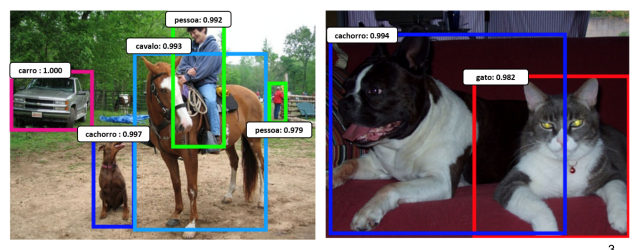

## Métodos Tradicional X Deep Learning

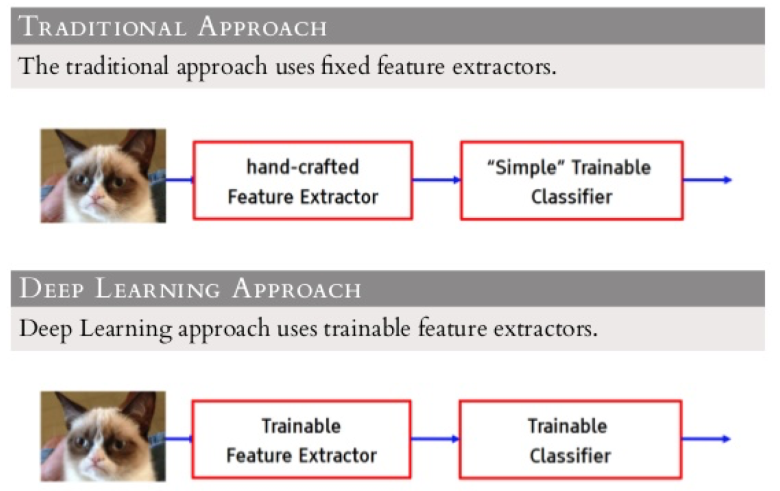

**O que é Deep Learning?**

Deep Learning, ou aprendizado profundo, é um subcampo da inteligência artificial (IA) que se baseia em arquiteturas de redes neurais profundas para realizar tarefas complexas de aprendizado e reconhecimento de padrões. Ao contrário de redes neurais rasas, as redes neurais profundas têm várias camadas (daí o termo "profundo") que permitem aprender representações hierárquicas e complexas dos dados.

**Exemplo: Estrutura da LeNet**

A LeNet é formada por 3 camadas principais e cada uma dessas possui uma
função específica na propagação do sinal de entrada:

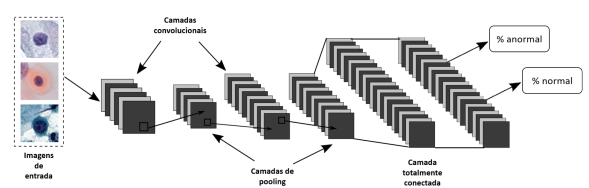

## Camada Convolucional

* Consiste num conjunto de filtros com dimensões reduzidas, mas que se
estendem por toda a profundidade de um volume de entrada, em outras
palavras, se a entrada possui profundidade 3, os filtros também terão
profundidade 3;
* Durante o processo de treinamento da rede os valores dos filtros são ajustados
para que sejam ativados na presença de características importantes dos
volumes de entrada, como orientação de bordas e manchas de cores;
* Nessa camada é realizado a convolução entre os filtros convolucionais e o
volume de entrada, em seguida os valores resultantes passam por uma função
de ativação.

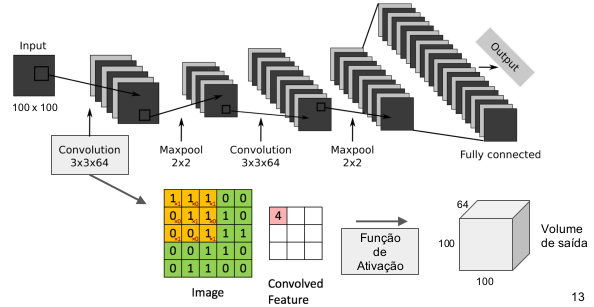

Existem três parâmetros que controlam as dimensões do volume de saída:

* Profundidade (Depth): quantidade de filtros na camada;
* Passo (Stride): tamanho do salto utilizado na convolução;
* Zero-padding: preenchimento das bordas do volume de entrada com zeros.

A profundidade do volume de saída sempre é igual a quantidade de filtros
convolucionais da camada;

**Exemplo de convolução**:

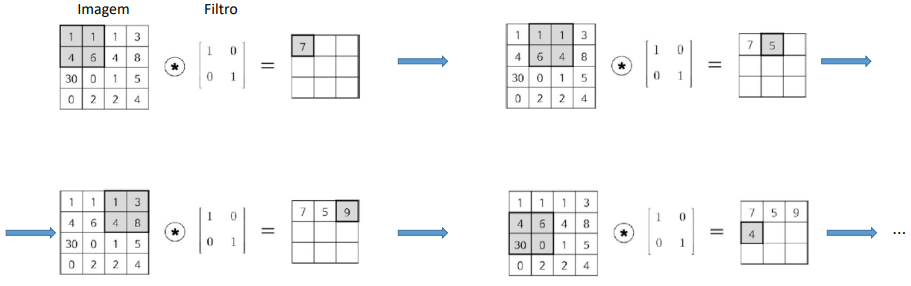

[Link com gif animado que mostra a convolução](https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184)

**Mapa de Ativação**

Regiões ativadas pelos filtros convolucionais:

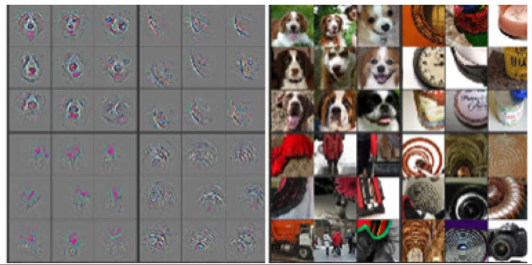


## Camada de Pooling

* Na operação de pooling, os valores pertencentes a uma determinada região do mapa de atributos, gerados pelas camadas convolucionais, são substituídos por alguma métrica dessa região;
* Essa operação é útil para eliminar valores desprezíveis, reduzindo a dimensão da representação dos dados e acelerando a computação necessária para as próximas camadas, além de criar uma invariância a pequenas mudanças e distorções locais.

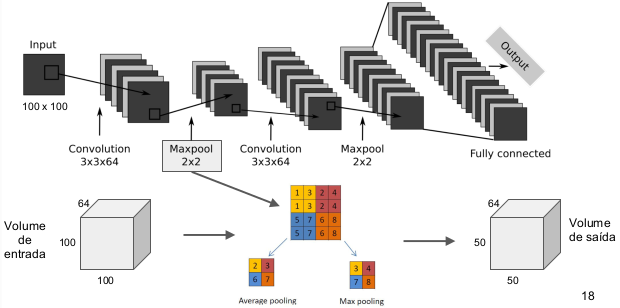

## Camada Totalmente Conectada

* A saída das camadas convolucionais e de pooling representam os features
extraídos das imagens de entradas, com isso, o objetivo das camadas
totalmente conectadas é utilizar essas características para classificar a
imagem em uma classe pré-determinada;
* Essas camadas são formadas por unidades de processamento conhecidas como
neurônio, e o termo "totalmente conectado" significa que todos os neurônios
da uma camada estão conectados a todos os neurônios da camada seguinte.
* A última camada da rede utiliza softmax como função de ativação. Essa função recebe um vetor de valores e produz a distribuição probabilística da imagem de entrada pertencer a cada umas das classes na qual a rede foi treinada.

## Treinando a CNN

* Passo 1: todos os filtros e pesos da rede são inicializados de forma aleatória;
* Passo 2: a rede recebe uma imagem de treino como entrada e realiza o
processo de propagação, com isso são obtidos os valores de probabilidade da
imagem pertencer a cada classe;
* Passo 3: é calculado o erro total obtido na camada de saída;
* Passo 4: o algoritmo do backpropagation é utilizado para calcular os valores do gradiente do erro, em seguida os valores dos filtros e pesos são ajustados;
* Passo 5: os passos 2-4 são repetidos para todas as imagens do conjunto de
treinamento;

Devido ao ajuste realizado no passo 4, o erro obtido pela rede é menor a cada vez que uma mesma imagem passa pela rede. Essa redução no erro significa que a rede está aprendendo a classificar corretamente as imagens do treinamento;

Caso o conjunto de treinamento seja abundante e variado o suficiente, a rede
apresentará capacidade de generalização e conseguirá classificar corretamente novas imagens que não estavam presentes no processo de treinamento.

## Outras Arquiteturas

ILSVRC (ImageNet Large Scale Visual Recognition Challenge)

O ILSVRC 2012 ficou marcado como o primeiro ano no qual uma CNN atingiu o
primeiro lugar desse desafio.

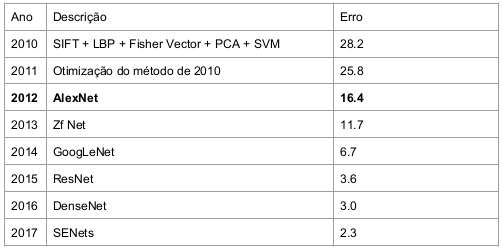

## Transferência de Aprendizado

* Na prática, não é comum treinar uma CNN com inicializações aleatórias de
pesos, pois para isso seria necessário uma grande quantidade de imagens e
algumas semanas de treinamento utilizando múltiplas GPUs;
* Com isso, uma prática comum consiste em utilizar os pesos de uma rede já
treinada para uma base muito grande, como a ImageNet que possui mais de 1
milhão de imagens e 1000 classes;
* Em seguida, esses pesos podem ser utilizados para inicializar e retreinar uma
rede, ou mesmo para a extração de características de imagens.

## CNN como Extrator de Características

* Uma forma de utilizar a CNN como extrator de características, é removendo a última camada da rede e utilizar a saída final da nova rede como características que descrevem a imagem de entrada.
* Também podem ser usados como features os valores obtidos após a sequência
de camadas convolucionais + pooling;
* Os features extraídos das imagens da nova base podem ser utilizadas
juntamente com um classificador que requeira menos dados para o treinamento
que uma CNN;

## Fine-tuning

* A estratégia de fine-tuning consiste em dar continuidade ao treinamento de uma rede;
* Os pesos de todas as camadas de uma uma rede pré-treinada, com exceção da
última camada, são utilizados para a inicialização de uma nova CNN;
* É possível fazer o fine-tuning de todas as camadas de uma CNN, ou de parte da rede.

# Treinando uma Rede Neural Convolucional usando o Keras

- Arquitetura simples com duas camadas convolucionais
- Utilizando um conjunto de imagens de células cervicais

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from skimage.io import imread
from skimage.transform import resize

# Ler dados

In [2]:
database_classes = glob('database/*/')
n_classes = len(database_classes)
n_files = glob('database/*/*.tif')

labels = np.zeros((len(n_files),n_classes))
images = np.zeros((len(n_files),100,100,3))

cont = 0
lb = 0
for classes in database_classes:
    files_in_classe = glob(classes+'*.tif')
    for fc in files_in_classe:
        labels[cont,lb] = 1
        im = imread(fc)
        image_resized = resize(im, (100,100,3))
        images[cont,:,:,:] = image_resized
        cont+=1
    lb +=1

In [3]:
labels.shape

(200, 2)

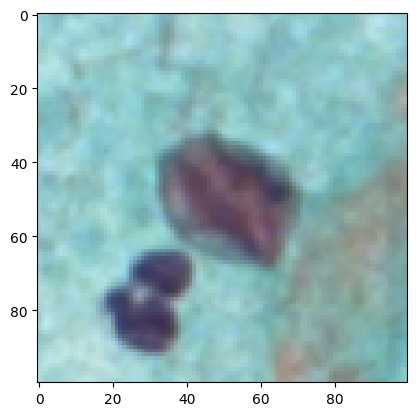

In [4]:
plt.imshow(images[150,:,:,:])

# Dividindo dados em Treino e Teste

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3)

In [6]:
print('Tamanho do Treino: ', X_train.shape)
print('Tamanho do Teste: ', X_test.shape)

Tamanho do Treino:  (140, 100, 100, 3)
Tamanho do Teste:  (60, 100, 100, 3)


# Construindo a CNN

In [7]:
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from time import time

2023-12-06 12:43:10.399589: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 12:43:10.447871: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 12:43:10.447906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 12:43:10.449492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 12:43:10.457599: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 12:43:10.458357: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [8]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3),name='layer_conv1'))
model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool1'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',name='layer_conv2'))
model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool2'))

model.add(layers.Flatten(name='layer_flatten'))

model.add(layers.Dropout(rate=0.75,name='layer_drop'))

model.add(layers.Dense(units=256, activation='relu',name='layer_fc1'))

model.add(layers.Dense(units=128, activation='relu',name='layer_fc2'))

model.add(layers.Dense(units=2, activation = 'softmax',name='layer_softmax'))

In [9]:
# model = keras.Sequential()

# model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(100,100,3),name='layer_conv1'))
# model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool1'))

# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',name='layer_conv2'))
# model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool2'))

# model.add(layers.Flatten(name='layer_flatten'))

# model.add(layers.Dense(units=128, activation='relu',name='layer_fc1'))

# model.add(layers.Dense(units=2, activation = 'sigmoid',name='layer_sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_conv1 (Conv2D)        (None, 98, 98, 64)        1792      
                                                                 
 layer_pool1 (MaxPooling2D)  (None, 49, 49, 64)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 47, 47, 64)        36928     
                                                                 
 layer_pool2 (MaxPooling2D)  (None, 23, 23, 64)        0         
                                                                 
 layer_flatten (Flatten)     (None, 33856)             0         
                                                                 
 layer_drop (Dropout)        (None, 33856)             0         
                                                                 
 layer_fc1 (Dense)           (None, 256)               8

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(0.0001), metrics=['accuracy'])

In [11]:
EPOCHS = 50
BATCH_SIZE = 10

In [12]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.2)
train_generator = ImageDataGenerator().flow(X_train, Y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, Y_validation, batch_size=BATCH_SIZE)

In [13]:
steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/50


/tmp/ipykernel_28309/3863351427.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,


11/11 [==============================] - 2s 158ms/step - loss: 0.6839 - accuracy: 0.5196 - val_loss: 0.6827 - val_accuracy: 0.5500
Epoch 2/50
11/11 [==============================] - 2s 137ms/step - loss: 0.6757 - accuracy: 0.5392 - val_loss: 0.6740 - val_accuracy: 0.6000
Epoch 3/50
11/11 [==============================] - 1s 133ms/step - loss: 0.6775 - accuracy: 0.5294 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 4/50
11/11 [==============================] - 2s 137ms/step - loss: 0.6679 - accuracy: 0.5392 - val_loss: 0.6623 - val_accuracy: 0.6000
Epoch 5/50
11/11 [==============================] - 2s 150ms/step - loss: 0.6673 - accuracy: 0.5784 - val_loss: 0.6679 - val_accuracy: 0.5500
Epoch 6/50
11/11 [==============================] - 2s 133ms/step - loss: 0.6742 - accuracy: 0.5784 - val_loss: 0.6352 - val_accuracy: 0.6500
Epoch 7/50
11/11 [==============================] - 2s 135ms/step - loss: 0.6692 - accuracy: 0.5490 - val_loss: 0.6498 - val_accuracy: 0.6000
Epoch 8/50
11/11 

**Teste**

In [14]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 98ms/step - loss: 0.6678 - accuracy: 0.4333
Test loss: 0.6678149104118347
Test accuracy: 0.4333333373069763


**Tensorboard**

In [16]:
# !tensorboard --logdir=logs/

# CONSTRUINDO UMA NOVA CNN

In [20]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import  Flatten, Dense, Activation,Convolution2D,MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import backend as K
import random
%matplotlib inline

In [25]:
Optimizer=Adam(learning_rate=0.001)
objective='binary_crossentropy'
def normalizacao(x):
    return (x-K.mean(x))/K.std(x)
model=Sequential()
#camada de entrada
model.add(Activation(activation=normalizacao, input_shape=(100, 100,3)))
#camada convolucional
model.add(Convolution2D(32,5,5,activation='relu'))
#camada de pooling
model.add(MaxPooling2D(pool_size=(2,2)))
#camada convolucional
model.add(Convolution2D(64,3,3,activation='relu'))
#camada de pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#Relu 
model.add(Dense(128, activation='relu'))
#Sigmoid - camada totalmente conectada
model.add(Dense(Y_train.shape[1]))
model.add(Activation('sigmoid'))
model.compile(loss=objective,optimizer=Optimizer,metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 activation_5 (Activation)   (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)               

In [27]:
random.seed(250)
model.fit(X_train,Y_train,batch_size=200,epochs=30,verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 717ms/step - loss: 0.7069 - accuracy: 0.2472
Epoch 2/30
1/1 [==============================] - 0s 36ms/step - loss: 0.6719 - accuracy: 0.7303
Epoch 3/30
1/1 [==============================] - 0s 34ms/step - loss: 0.6416 - accuracy: 0.7640
Epoch 4/30
1/1 [==============================] - 0s 36ms/step - loss: 0.6096 - accuracy: 0.7865
Epoch 5/30
1/1 [==============================] - 0s 31ms/step - loss: 0.5749 - accuracy: 0.7978
Epoch 6/30
1/1 [==============================] - 0s 34ms/step - loss: 0.5379 - accuracy: 0.7978
Epoch 7/30
1/1 [==============================] - 0s 35ms/step - loss: 0.5009 - accuracy: 0.8202
Epoch 8/30
1/1 [==============================] - 0s 35ms/step - loss: 0.4648 - accuracy: 0.8315
Epoch 9/30
1/1 [==============================] - 0s 36ms/step - loss: 0.4307 - accuracy: 0.7978
Epoch 10/30
1/1 [==============================] - 0s 38ms/step - loss: 0.4002 - accuracy: 0.8090
Epoch 11/30
1/1 [===========

In [32]:
scores = model.evaluate(X_test, Y_test)
print("Teste: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.2256 - accuracy: 0.9167
Teste: 
accuracy: 91.67%


In [33]:
scores = model.evaluate(X_train, Y_train)
print("Treino: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 6ms/step - loss: 0.0818 - accuracy: 0.9775
Treino: 
accuracy: 97.75%
